In [15]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

%matplotlib inline 

In [69]:
pd.options.display.float_format = '{:.2f}'.format

In [16]:
df = pd.read_csv("Advertising.csv", index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [17]:
df.shape

(200, 4)

In [18]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

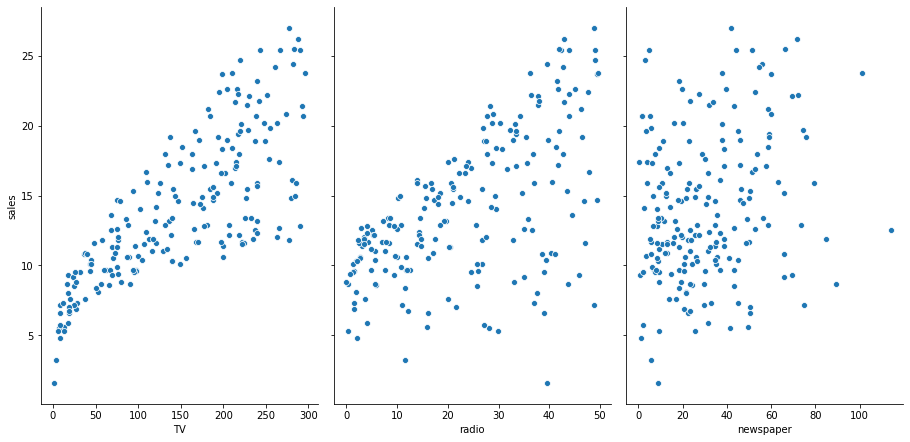

In [26]:
sns.pairplot(df,x_vars=['TV','radio','newspaper'],y_vars=["sales"],height=6,aspect=0.7)

# simple linear regression

In [28]:
linear_model=smf.ols(formula='sales ~ TV',data=df).fit()

In [29]:
linear_model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [31]:
feature_cols=["TV"]
X=df[feature_cols]
Y=df["sales"]

In [32]:
linear_model2=LinearRegression()

In [33]:
linear_model2.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
print("coefficients :-",linear_model2.coef_)

coefficients :- [0.04753664]


In [36]:
print("intercepts:-",linear_model2.intercept_)

intercepts:- 7.032593549127693


# manual prediction

In [37]:
7.032594 + 0.047537*50


9.409444

# stats model prediction

In [39]:
# stats model 
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})

# predict for a new observation
linear_model.predict(X_new)

0    9.409426
dtype: float64

# sklearn prediction

In [50]:
#sklearn model
linear_model2.predict(X)

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431,
       10.17476548, 17.23871025,  8.16396559, 11.66741599, 16.73482186,
       16.32125309, 10.25557777, 20.40940417, 10.32212907, 14.03474068,
       17.41459582, 18.31779199,  7.6600772 , 17.88520856,  9.99412625,
       19.52997632, 13.82557947, 18.44614092, 18.85970969, 10.38868036,
       20.95607553, 12.39948025, 11.653155  , 19.65832525, 11.58185004,
       20.85149492, 19.72012288, 10.58358059,  9.08142275, 17.87094757,
       16.65876324, 15.44657891, 20.98935118, 16.86792445,  8.22576322,
       15.35625929, 11.2966302 , 18.43663359, 17.83291826, 10.21279479,
       16.53041431, 11.80527225, 17.31952254, 15.71278409, 19.52046899,
       16.48763133,  7.37961102, 13.50708398, 17.05331735, 17.04856369,
        9.57580381, 19.45391769, 18.4081116 , 11.91460652, 13.26464711,
       10.31262174,  8.52999772, 13.65444756, 18.31779199, 17.33

# plotting the least square lines

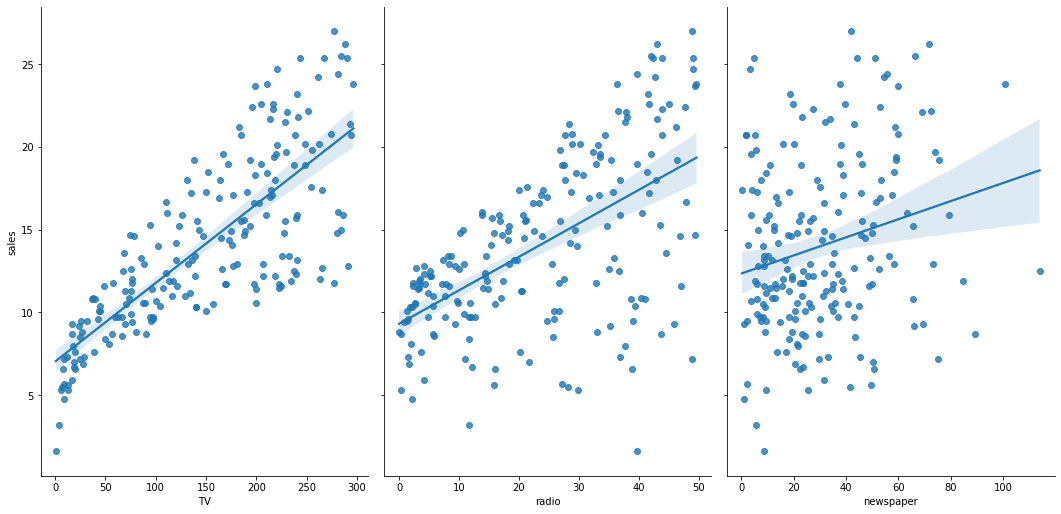

In [55]:
sns.pairplot(df, x_vars=['TV','radio','newspaper'], y_vars='sales', height=7, aspect=0.7, kind='reg')


In [57]:
### STATSMODELS ###

# print the confidence intervals for the model coefficients
linear_model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [58]:
linear_model.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [63]:
linear_model.rsquared


0.611875050850071

In [65]:
linear_model2.score(X,Y)

0.611875050850071

In [70]:
#chart for statsmodel
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 04 Jul 2020   Prob (F-statistic):           1.47e-42
Time:                        22:05:35   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""